#### Code by henrique wegner

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import mpl_toolkits
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error

from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge


from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2

# Import Datasets

In [2]:
df_final = pd.read_csv("data/data_final2.csv")

In [3]:
df_final

,Unnamed: 0,Luas_quantity,Bus_quantity,Train_quantity,PS_quantity,SS_quantity,Garda_quantity,Price,VAT_exclusive,Longitude,Latitude,New_Dwelling_House_Apartment,Second_Hand_Dwelling_House_Apartment
0,4,0,33,0,1,0,0,830000.0,0,-6.181892,53.365139,0,1
1,8,0,32,0,1,0,0,360000.0,0,-6.181405,53.362710,0,1
2,9,0,36,0,1,0,0,630000.0,0,-6.183087,53.362717,0,1
3,14,0,53,1,7,2,0,260000.0,0,-6.253829,53.370047,0,1
4,15,0,62,1,7,4,0,375000.0,0,-6.238056,53.365356,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43387,46396,0,55,0,5,3,1,477000.0,0,-6.294334,53.295079,0,1
43388,46397,0,66,0,3,2,1,555000.0,0,-6.271758,53.388159,0,1
43389,46398,0,38,0,1,0,0,248500.0,0,-6.283514,53.405929,0,1
43390,46399,0,49,1,5,0,0,320000.0,0,-6.212927,53.376221,0,1


# Correlation Matrix

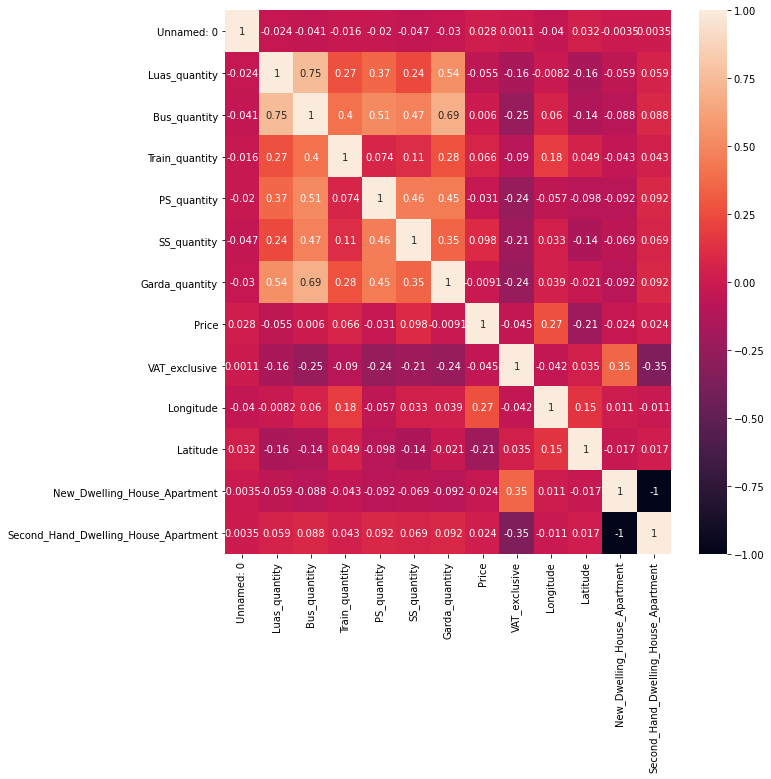

In [4]:
plt.rcParams["figure.figsize"]=10,10
corrMatrix = df_final.corr()
sns.heatmap(corrMatrix, annot=True)

fig = plt.show()

# Choosing the variables
- It is separated in two types for testing of different labels.

In [5]:
prediction_variables = ['Luas_quantity', 'Bus_quantity','Train_quantity','Second_Hand_Dwelling_House_Apartment', 'New_Dwelling_House_Apartment', 'PS_quantity','SS_quantity', 'Garda_quantity', 'VAT_exclusive','Longitude','Latitude']
prediction_variables_2 = ['Luas_quantity', 'Train_quantity','Second_Hand_Dwelling_House_Apartment', 'New_Dwelling_House_Apartment', 'PS_quantity','SS_quantity', 'VAT_exclusive','Longitude','Latitude']

# Split Test

In [6]:
X = df_final[prediction_variables]
y = df_final["Price"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# Linear Regression

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = regressor.predict(X_test)

In [10]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 471628.91  237810.98]
 [ 364076.44  175000.  ]
 [ 326135.41  390000.  ]
 ...
 [ 543930.74  308370.05]
 [ 537617.   1350000.  ]
 [ 408954.63  176000.  ]]


### Linear Regression Results

In [11]:
print('Explained Variance Score of Linear Regression model is {}'.format(evs(y_test, y_pred)))
print('R-Squared of Linear Regression model is {}'.format(r2(y_test, y_pred)))

Explained Variance Score of Linear Regression model is 0.1572285332768133
R-Squared of Linear Regression model is 0.15721062966250354


### Cross Validation Plot

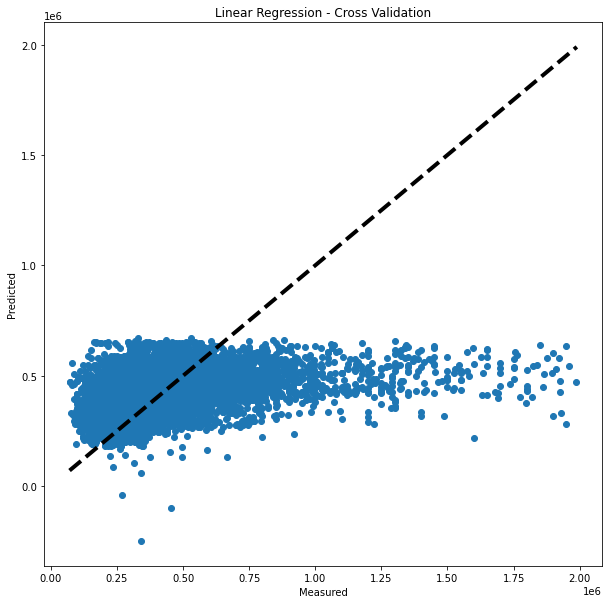

In [12]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title("Linear Regression - Cross Validation")
plt.show()

# XGBoost 

In [13]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(learning_rate = 0.1, n_estimators = 40,
                         max_depth=14, min_child_weight=2,
                         gamma = 1, subsample = 0.7,
                         objective="reg:squarederror",
                         seed=1)

xg_reg.fit(X_train,y_train)

pred_XGB = xg_reg.predict(X_test)

C:\Users\henri\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [14]:
print("Mean squared error: %.2f" % np.mean((xg_reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % xg_reg.score(X_test, y_test))

Mean squared error: 25433591352.08
Variance score: 0.57


### XGBoost Results

In [15]:
print('Explained Variance Score of XGBoost model is {}'.format(evs(y_test, pred_XGB)))
print('R-Squared of XGBoost model is {}'.format(r2(y_test, pred_XGB)))

Explained Variance Score of XGBoost model is 0.5681369302837654
R-Squared of XGBoost model is 0.5668303539542203


In [16]:
np.set_printoptions(precision=2)
print(np.concatenate((pred_XGB.reshape(len(pred_XGB),1), y_test.values.reshape(len(y_test),1)),1))

[[ 325164.75  237810.98]
 [ 136187.    175000.  ]
 [ 329199.09  390000.  ]
 ...
 [ 334124.84  308370.05]
 [ 667525.06 1350000.  ]
 [ 206128.27  176000.  ]]


# Ridge

In [17]:
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

### Ridge Results

In [18]:
print('Explained Variance Score of Ridge model is {}'.format(evs(y_test, pred_ridge)))
print('R-Squared of Ridge model is {}'.format(r2(y_test, pred_ridge)))

Explained Variance Score of Ridge model is 0.157214107766802
R-Squared of Ridge model is 0.15719620016330604


# Lasso

In [19]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

### Lasso Results

In [20]:
print('Explained Variance Score of Lasso model is {}'.format(evs(y_test, pred_lasso)))
print('R-Squared of Lasso model is {}'.format(r2(y_test, pred_lasso)))

Explained Variance Score of Lasso model is 0.1572285268568372
R-Squared of Lasso model is 0.15721062327214175


# Bayesian Ridge

In [21]:
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
pred_bayesian = bayesian.predict(X_test)

### Bayesian Ridge Results

In [22]:
print('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, pred_bayesian)))
print('R-Squared of Bayesian model is {}'.format(r2(y_test, pred_bayesian)))

Explained Variance Score of Bayesian model is 0.15721796057168347
R-Squared of Bayesian model is 0.15720005396540182


# SVR

In [23]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_test, y_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [24]:
pred_svr = regr.predict(X_test)

### SVR Results

In [25]:
print('Explained Variance Score of SVR model is {}'.format(evs(y_test, pred_svr)))
print('R-Squared of SVR model is {}'.format(r2(y_test, pred_svr)))

Explained Variance Score of SVR model is 0.0005366174713297145
R-Squared of SVR model is -0.08295277285076086


# Random Forests

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=2)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=2)

In [27]:
random_predict = regressor.predict(X_test)

In [28]:
random_predict

array([314263.94, 131983.84, 333174.93, ..., 334592.16, 679344.73,
       214188.23])

### Random Forests Results

In [29]:
print('Explained Variance Score of Random Forest Tree model is {}'.format(evs(y_test, random_predict)))
print('R-Squared of Random Forest Tree model is {}'.format(r2(y_test, random_predict)))

Explained Variance Score of Random Forest Tree model is 0.5827743074912873
R-Squared of Random Forest Tree model is 0.5825285472633464


### Saving the model

In [30]:
filename = 'random_forest_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

### Cross Validation Plot

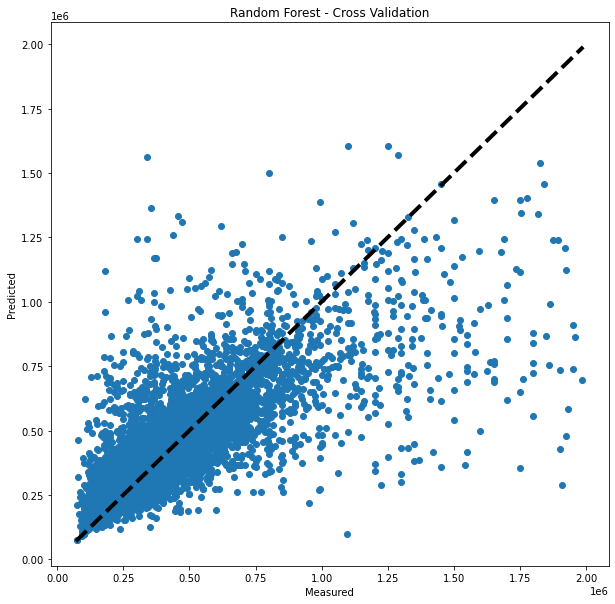

In [31]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
ax.scatter(y_test, random_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title("Random Forest - Cross Validation")
plt.show()

# Catboost

In [32]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations = 100,
                          learning_rate=0.8,
                          depth=7)

model.fit(X_train, y_train)

pred_catboost = model.predict(X_test)

0:	learn: 212751.5965065	total: 163ms	remaining: 16.1s
1:	learn: 205579.8207453	total: 168ms	remaining: 8.25s
2:	learn: 200854.8015696	total: 174ms	remaining: 5.62s
3:	learn: 196900.5051300	total: 179ms	remaining: 4.3s
4:	learn: 195774.3178460	total: 185ms	remaining: 3.51s
5:	learn: 193512.7588426	total: 190ms	remaining: 2.97s
6:	learn: 191396.5936415	total: 195ms	remaining: 2.59s
7:	learn: 190266.0627840	total: 200ms	remaining: 2.3s
8:	learn: 189753.6147877	total: 205ms	remaining: 2.08s
9:	learn: 188231.3854544	total: 210ms	remaining: 1.89s
10:	learn: 187182.3608260	total: 216ms	remaining: 1.75s
11:	learn: 186353.6472727	total: 221ms	remaining: 1.62s
12:	learn: 185726.6143418	total: 226ms	remaining: 1.51s
13:	learn: 185295.2729049	total: 231ms	remaining: 1.42s
14:	learn: 184417.8915367	total: 236ms	remaining: 1.34s
15:	learn: 183446.3359888	total: 241ms	remaining: 1.27s
16:	learn: 182543.8075783	total: 246ms	remaining: 1.2s
17:	learn: 182163.4406002	total: 251ms	remaining: 1.14s
18:	l

### CatBoost Results

In [33]:
print('Explained Variance Score of Catboost model is {}'.format(evs(y_test,pred_catboost)))
print('R-Squared of Catboost model is {}'.format(r2(y_test, pred_catboost)))

Explained Variance Score of Catboost model is 0.47316430793632125
R-Squared of Catboost model is 0.4731559226270149


# Decision Trees

In [34]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

pred_decision_trees = regressor.predict(X_test)

### Decision Trees Results

In [35]:
print('Explained Variance Score of Decision Trees model is {}'.format(evs(y_test,pred_decision_trees)))
print('R-Squared of Decision Trees model is {}'.format(r2(y_test, pred_decision_trees)))

Explained Variance Score of Decision Trees model is 0.3332395965295819
R-Squared of Decision Trees model is 0.3324537598967301


# Gradient Boosting

In [36]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
clf = GradientBoostingRegressor(n_estimators=25, learning_rate=0.6, max_depth=5, random_state=0).fit(X_train, y_train)

In [38]:
pred_GB = clf.predict(X_test)

### Gradient Boosting Results

In [39]:
print('Explained Variance Score of Gradient Boosting model is {}'.format(evs(y_test,pred_GB)))
print('R-Squared of Gradient Boosting model is {}'.format(r2(y_test, pred_GB)))

Explained Variance Score of Gradient Boosting model is 0.43979002211754326
R-Squared of Gradient Boosting model is 0.43976830296062275


# Hist Gradient Boosting

In [40]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

In [41]:
hgb = HistGradientBoostingRegressor(max_depth = 10, learning_rate = 0.4,random_state=2, l2_regularization = 0.5).fit(X_train, y_train)
pred_HGB = hgb.predict(X_test)

### Hist Gradient Boosting Results

In [42]:
print('Explained Variance Score of Gradient Boosting model is {}'.format(evs(y_test,pred_HGB)))
print('R-Squared of Gradient Boosting model is {}'.format(r2(y_test, pred_HGB)))

Explained Variance Score of Gradient Boosting model is 0.49959483463300247
R-Squared of Gradient Boosting model is 0.499496912029446


# Stacking

In [43]:
from sklearn.ensemble import StackingRegressor

estimators = [
('lr', LinearRegression()),
('clf',  GradientBoostingRegressor(n_estimators=25, learning_rate=0.6, max_depth=5))
]
reg = StackingRegressor(
     estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100,
                                          random_state=42)
)

reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('clf',
                               GradientBoostingRegressor(learning_rate=0.6,
                                                         max_depth=5,
                                                         n_estimators=25))],
                  final_estimator=RandomForestRegressor(random_state=42))

In [44]:
pred_stack = reg.predict(X_test)

### Stacking Results

In [45]:
print('Explained Variance Score of Stacking model is {}'.format(evs(y_test,pred_stack)))
print('R-Squared of Stacking model is {}'.format(r2(y_test, pred_stack)))

Explained Variance Score of Stacking model is 0.3463051914969495
R-Squared of Stacking model is 0.3445689519654337


# Voting Regression

In [46]:
from sklearn.ensemble import VotingRegressor

lr = LinearRegression()
forest = RandomForestRegressor(n_estimators=100, random_state=1)
hgb = HistGradientBoostingRegressor(max_depth = 10, learning_rate = 0.4,random_state=2, l2_regularization = 0.5)
clf = GradientBoostingRegressor(n_estimators=25, learning_rate=0.6, max_depth=5, random_state=0)

er = VotingRegressor([('lr', lr), ('rf', forest), ('hgb',hgb), ('clf',clf)])

er.fit(X_train,y_train)

pred_voting = er.predict(X_test)

### Voting Results

In [47]:
print('Explained Variance Score of Voting model is {}'.format(evs(y_test,pred_voting)))
print('R-Squared of Voting model is {}'.format(r2(y_test, pred_voting)))

Explained Variance Score of Voting model is 0.5146589420321566
R-Squared of Voting model is 0.5146584517646812


# LightGBM

In [48]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=7,
                              learning_rate=0.6, n_estimators=2000,
                              random_state = 2)

model_lgb.fit(X_train, y_train)
lgb_train_pred = model_lgb.predict(X_test)



### LightGBM Results

In [49]:
print('Explained Variance Score of Gradient Boosting model is {}'.format(evs(y_test,lgb_train_pred)))
print('R-Squared of Gradient Boosting model is {}'.format(r2(y_test, lgb_train_pred)))

Explained Variance Score of Gradient Boosting model is 0.5012842442125294
R-Squared of Gradient Boosting model is 0.5012830462900238
